### Problem Statement

The **Deutsch–Jozsa algorithm** is a quantum algorithm designed to solve a specific decision problem. You are given a "black-box" oracle function $ f(x) $ which takes an $n$-bit string as input and returns either 0 or 1. The function is either **constant** (i.e., it returns the same output for all inputs) or **balanced** (i.e., it returns 0 for half of the inputs and 1 for the other half). The task is to determine whether  $f(x)$  is constant or balanced using as few queries as possible.

In the classical setting, solving this problem requires up to  $2^{n-1} + 1$  queries in the worst case. However, the Deutsch–Jozsa algorithm can solve it with a single query by leveraging quantum superposition, interference, and measurement.

### Circuit Overview

The Deutsch–Jozsa algorithm consists of the following steps:

1. **Initialization**: Start with $ n $ input qubits, initialized in the $ |0\rangle $ state, and 1 ancilla qubit, initialized in the $ |1\rangle $ state.
2. **Hadamard Transformation**: Apply Hadamard gates to the input qubits and the ancilla to create a superposition of all possible input states.
3. **Oracle Query**: Apply the oracle function, which marks the states depending on whether $ f(x) = 0 $ or $ f(x) = 1 $.
4. **Second Hadamard Transformation**: Apply Hadamard gates to the input qubits to interfere the amplitude of the states.
5. **Measurement**: Measure the input qubits. If all measurements return $ 0 $, the function is constant; otherwise, it is balanced.

### Deutsch–Jozsa Circuit Shape

Here's a generic form of the circuit for $ n  $ qubits:


![Deutsch-Jozsa Circuit](./DJ.png)


Where `H` stands for a **Hadamard gate**, `M` is the measurement, and the oracle gate depends on whether the function is constant or balanced.

### Step-by-Step Mathematics of the Algorithm

1. **Initialization**

   We start with $ n $ qubits initialized to $ |0\rangle $ and an ancilla qubit initialized to $ |1\rangle $:
   $$
   |\psi_0\rangle = |0\rangle^{\otimes n} |1\rangle
   $$
   This represents the input and the ancillary qubit states.

2. **Apply Hadamard Transformation**

   Next, apply the **Hadamard gate** to each of the $ n $ input qubits and the ancilla. The Hadamard gate transforms a qubit from the $ |0\rangle $ state to an equal superposition of $ |0\rangle $ and $ |1\rangle $ states:
   $$
   H|0\rangle = \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)
   $$
   So, after applying Hadamard gates to all input qubits and the ancilla, the state of the system is:
   $$
   |\psi_1\rangle = \frac{1}{\sqrt{2^n}} \sum_{x=0}^{2^n-1} |x\rangle \otimes \frac{1}{\sqrt{2}} \left( |0\rangle - |1\rangle \right)
   $$
   This puts the system into a superposition of all possible input states $ x $, with the ancilla in a superposition of $ |0\rangle $ and $ |1\rangle $.

3. **Oracle Query**

   The oracle is a unitary transformation $ U_f $ that maps $ |x\rangle |y\rangle $ to $ |x\rangle |y \oplus f(x)\rangle $, where $ \oplus $ represents XOR (addition modulo 2). If we pass the ancilla in the state $ \frac{1}{\sqrt{2}} (|0\rangle - |1\rangle) $, then applying the oracle modifies the phase of the input qubits depending on $ f(x) $:
   $$
   U_f |\psi_1\rangle = \frac{1}{\sqrt{2^n}} \sum_{x=0}^{2^n-1} (-1)^{f(x)} |x\rangle \otimes \frac{1}{\sqrt{2}} \left( |0\rangle - |1\rangle \right)
   $$
   The ancilla is left unchanged, but the input qubits now carry a phase shift determined by $ f(x) $.

4. **Second Hadamard Transformation**

   Apply Hadamard gates to all the input qubits again. The Hadamard gate transforms a basis state $ |x\rangle $ into a superposition:
   $$
   H^{\otimes n} |x\rangle = \frac{1}{\sqrt{2^n}} \sum_{z=0}^{2^n-1} (-1)^{x \cdot z} |z\rangle
   $$
   After applying Hadamard to all $ n $ qubits, the state becomes:
   $$
   |\psi_2\rangle = \frac{1}{2^n} \sum_{z=0}^{2^n-1} \left( \sum_{x=0}^{2^n-1} (-1)^{f(x) + x \cdot z} \right) |z\rangle
   $$
   The probability of measuring $ |z\rangle $ depends on the sum inside the parentheses. 

5. **Measurement**

   Finally, measure the first $ n $ qubits. 

   - If the function $ f(x) $ is **constant**, all terms in the sum will interfere constructively only when $ z = 0 $, and we will always measure $ |0\rangle^{\otimes n} $ (i.e., all qubits are 0).
   - If the function $ f(x) $ is **balanced**, destructive interference will ensure that we measure something other than $ |0\rangle^{\otimes n} $ with high probability.

Thus, by examining the measurement result, we can determine if the function is constant or balanced.

### Example with $ n = 3 $

Suppose we have a balanced function with 3 input qubits:

1. **State after the first Hadamard**:
   $$
   |\psi_1\rangle = \frac{1}{\sqrt{8}} \sum_{x=0}^{7} |x\rangle \otimes \frac{1}{\sqrt{2}} (|0\rangle - |1\rangle)
   $$
2. **Oracle Query** applies phase shift based on $ f(x) $.
3. **Second Hadamard** transforms the superposition and interferes the amplitudes.
4. **Measurement** yields $ |000\rangle $ if $ f(x) $ is constant, and a non-zero outcome if it’s balanced.

This quantum interference allows the Deutsch–Jozsa algorithm to distinguish between constant and balanced functions with just **one query** to the oracle.


In [1]:
# Qiskit Deutsch–Jozsa Algorithm

from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

# Oracle for a balanced function (this can be modified)matplotlib pandas openpyxl
def dj_balanced_oracle(n):
    oracle_qc = QuantumCircuit(n+1)
    for qubit in range(n):
        oracle_qc.cx(qubit, n)  # CNOTs create the balanced oracle
    return oracle_qc

# Create Deutsch-Jozsa circuit
def deutsch_jozsa_circuit(oracle, n):
    qc = QuantumCircuit(n+1, n)

    # Initialize the input qubits to |0⟩ and the output qubit to |1⟩
    qc.x(n)
    qc.h(range(n+1))

    # Apply the oracle
    qc.append(oracle, range(n+1))

    # Apply Hadamard gates after the oracle
    qc.h(range(n))

    # Measure the first n qubits
    qc.measure(range(n), range(n))
    
    return qc

# Number of qubits in the input
n = 3

# Create the oracle
oracle = dj_balanced_oracle(n)

# Create the Deutsch-Jozsa circuit
qc = deutsch_jozsa_circuit(oracle, n)

# Simulate the circuit
simulator   = Aer.get_backend('qasm_simulator')
compiled    = transpile(qc,simulator)
result      = simulator.run(compiled).result()
#result = execute(qc, simulator, shots=1024).result()

# Plot the result
counts = result.get_counts()
print(counts)


# Assuming you already have `counts` from the Qiskit simulation
plot_histogram(counts)
plt.show()  # Use matplotlib to display the figure


{'111': 1024}


In [2]:
# Cirq Deutsch–Jozsa Algorithm

import cirq

# Oracle for a balanced function (this can be modified)
def dj_balanced_oracle(qubits, ancilla):
    oracle = cirq.Circuit()
    for qubit in qubits:
        oracle.append(cirq.CNOT(qubit, ancilla))  # CNOTs create the balanced oracle
    return oracle

# Create the Deutsch-Jozsa circuit
def deutsch_jozsa_circuit(oracle, qubits, ancilla):
    # Initialize the circuit
    circuit = cirq.Circuit()

    # Apply Hadamard to the input qubits and the ancilla
    circuit.append(cirq.H.on_each(*qubits))
    circuit.append(cirq.X(ancilla))
    circuit.append(cirq.H(ancilla))

    # Apply the oracle
    circuit.append(oracle)

    # Apply Hadamard gates after the oracle
    circuit.append(cirq.H.on_each(*qubits))

    # Measure the input qubits
    circuit.append(cirq.measure(*qubits))

    return circuit

# Number of qubits in the input
n = 3

# Create qubits and ancilla
qubits = [cirq.LineQubit(i) for i in range(n)]
ancilla = cirq.LineQubit(n)

# Create the oracle
oracle = dj_balanced_oracle(qubits, ancilla)

# Create the Deutsch-Jozsa circuit
circuit = deutsch_jozsa_circuit(oracle, qubits, ancilla)

# Simulate the circuit
simulator = cirq.Simulator()
result = simulator.run(circuit, repetitions=1024)

# Plot the results
print(result)


q(0),q(1),q(2)=1111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111

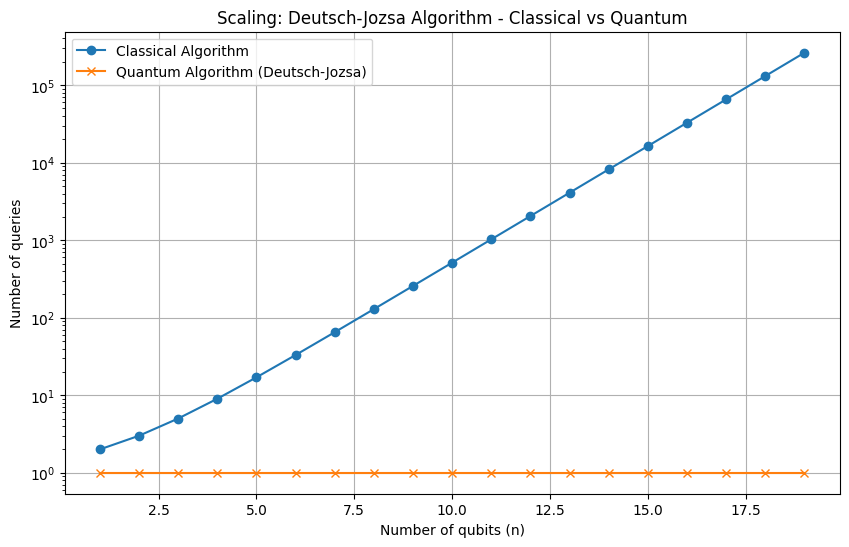

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Number of qubits
n_values = np.arange(1, 20)

# Classical scaling (worst case 2^(n-1) + 1)
classical_queries = 2**(n_values - 1) + 1

# Quantum scaling (always 1 query)
quantum_queries = np.ones_like(n_values)

# Plotting
plt.figure(figsize=(10,6))
plt.plot(n_values, classical_queries, label="Classical Algorithm", marker="o")
plt.plot(n_values, quantum_queries, label="Quantum Algorithm (Deutsch-Jozsa)", marker="x")

plt.yscale('log')  # Log scale to highlight the exponential scaling
plt.xlabel("Number of qubits (n)")
plt.ylabel("Number of queries")
plt.title("Scaling: Deutsch-Jozsa Algorithm - Classical vs Quantum")
plt.legend()
plt.grid(True)
plt.show()
